In [46]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [88]:
c10_loss = pd.read_csv('../results/c100_loss_pretrained_statistics.csv')
c10_fine = pd.read_csv('../results/c100_fine_pretrained_statistics.csv')

In [89]:
sym_loss = c10_loss[(c10_loss['lossfunction']=='cce') & (c10_loss['noisetype']==False)].sort_values('noiserate')
sym_fine = c10_fine[(c10_fine['lossfunction']=='cce') & (c10_fine['noisetype']==False)].sort_values('noiserate')

In [90]:
asym_loss = c10_loss[(c10_loss['lossfunction']=='cce') & (c10_loss['noisetype']==True)].sort_values('noiserate')
asym_fine = c10_fine[(c10_fine['lossfunction']=='cce') & (c10_fine['noisetype']==True)].sort_values('noiserate')

In [91]:
def draw(loss, fine, ltype='cce',dtype='Sym', xaxis=[0.2, 0.4, 0.6, 0.8], key='precision'):
    fig, ax = plt.subplots()
    plt.rcParams.update({'font.size': 15})

    plt.plot(xaxis, loss[key].values, 'o-', label='loss-based')
    plt.plot(xaxis, fine[key].values, 'o-', label='fine')
    ax.set_xticks(xaxis)

    ax.set_xlabel('Noise rate'+' ('+str(dtype)+')')
    ax.set_ylabel(key.capitalize())
    plt.legend()
    plt.savefig(ltype + '_' + str(dtype) + '_' + key)

In [92]:
sym_loss.keys()

Index(['Unnamed: 0', 'noisetype', 'noiserate', 'lossfunction', 'selected',
       'precision', 'recall', 'specificity', 'accuracy'],
      dtype='object')

/home/taehyeon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


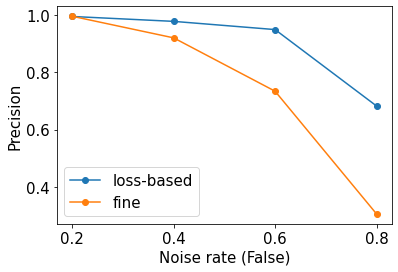

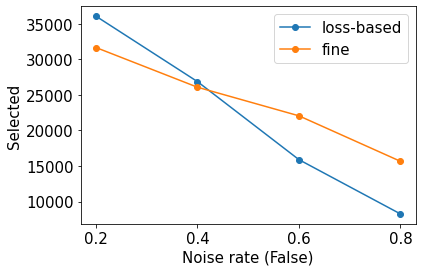

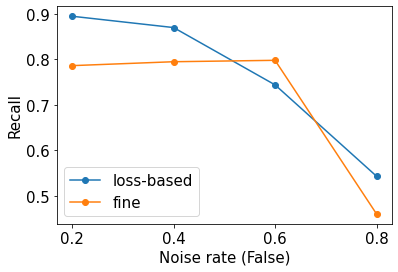

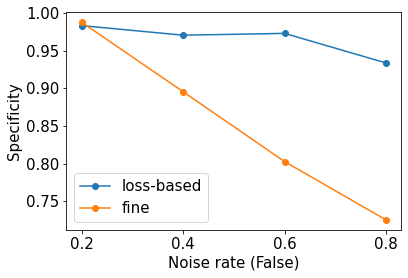

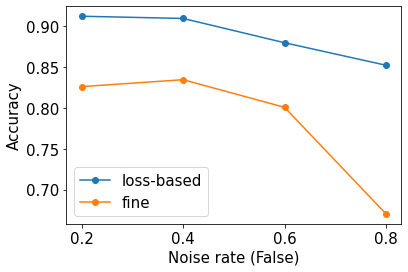

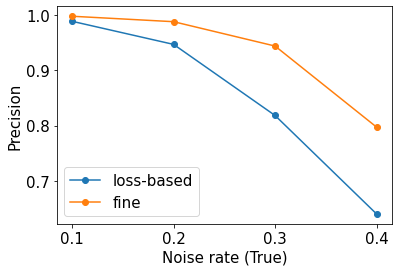

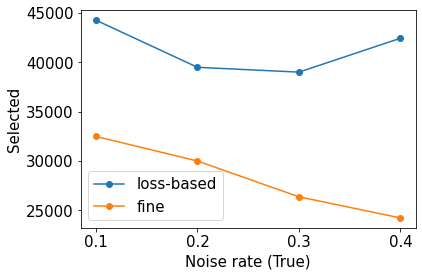

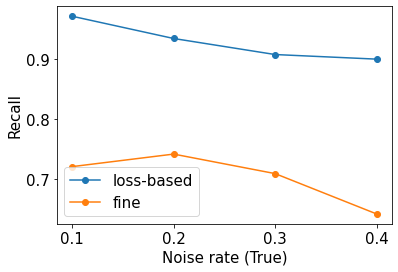

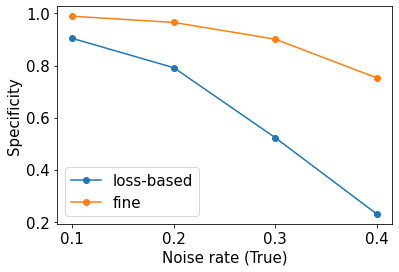

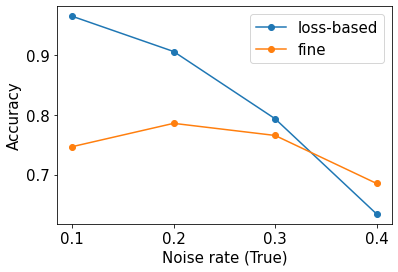

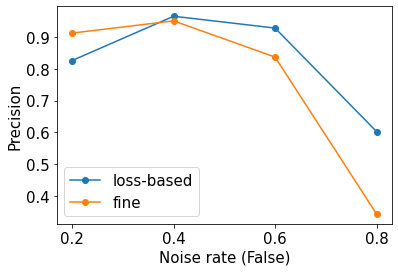

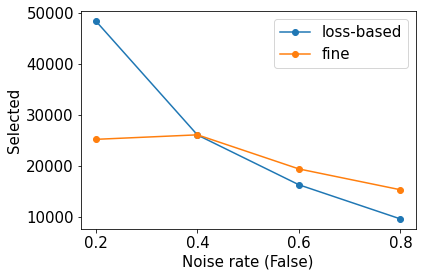

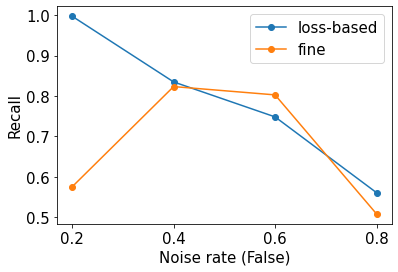

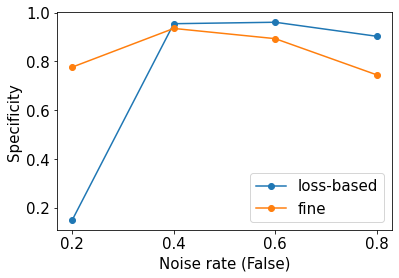

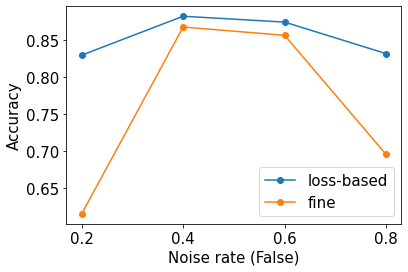

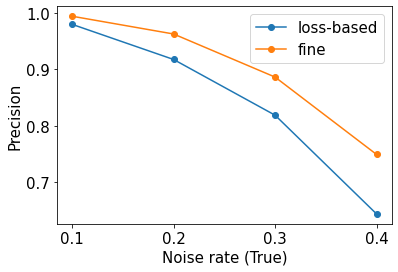

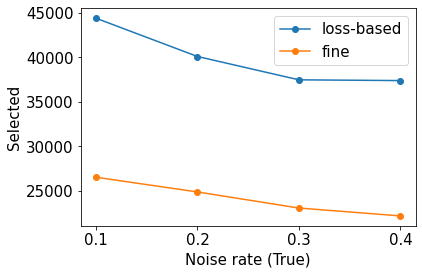

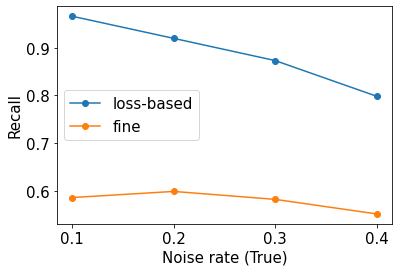

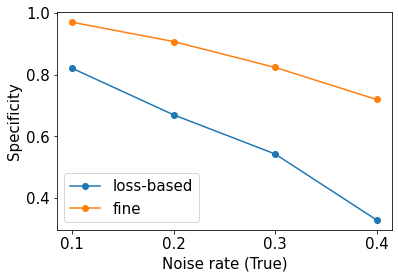

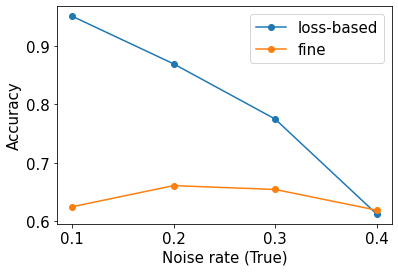

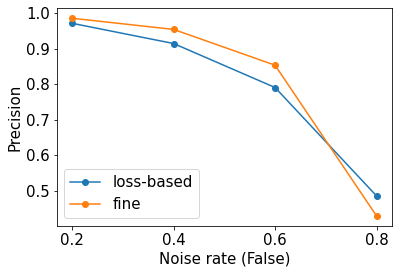

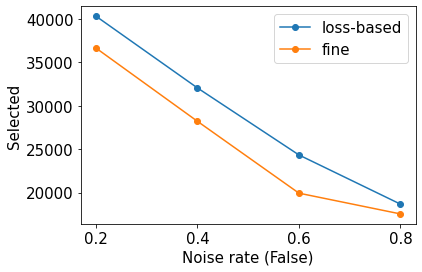

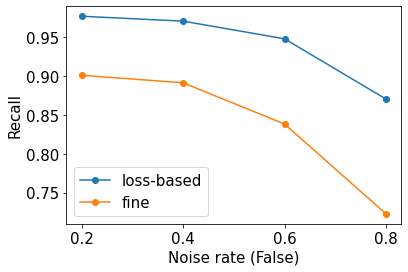

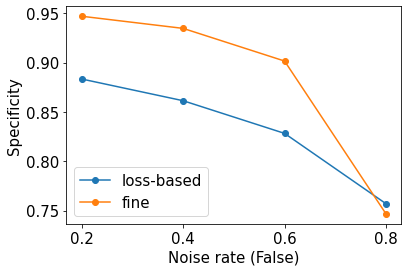

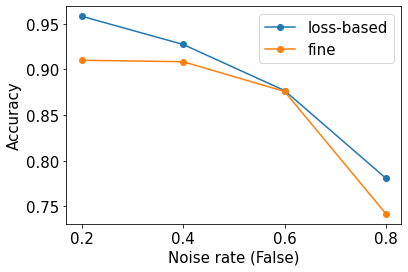

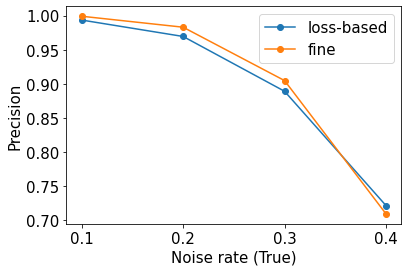

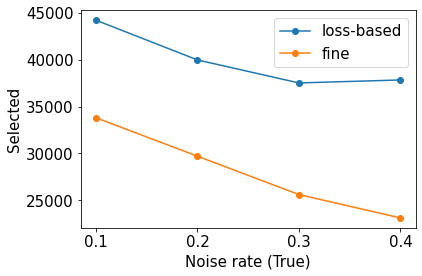

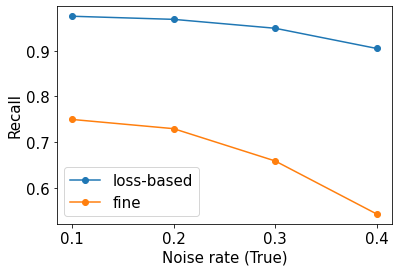

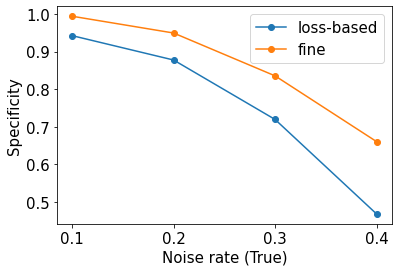

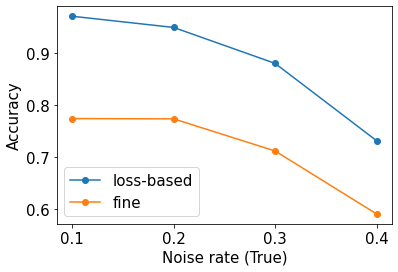

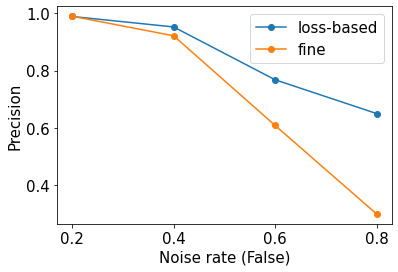

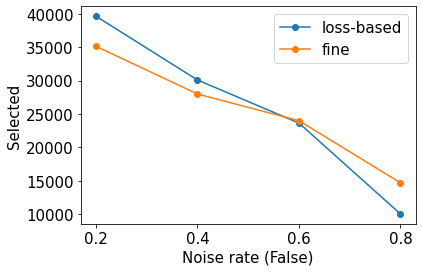

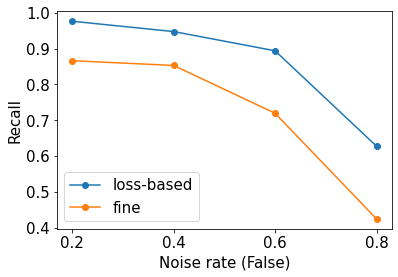

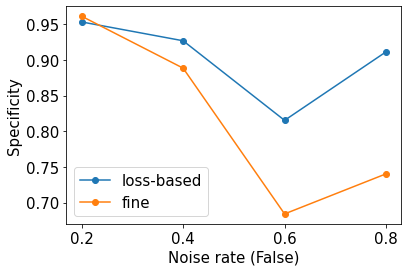

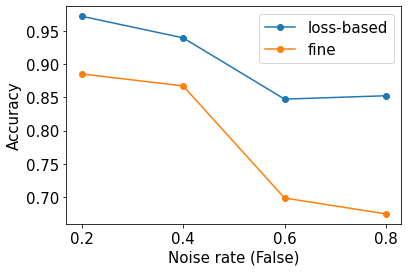

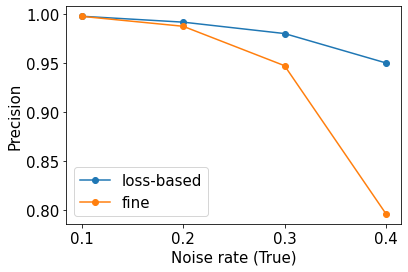

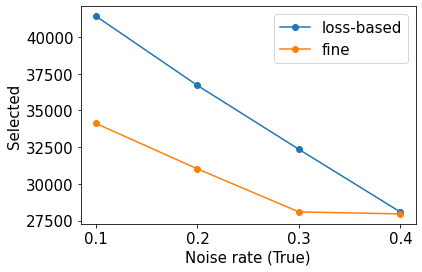

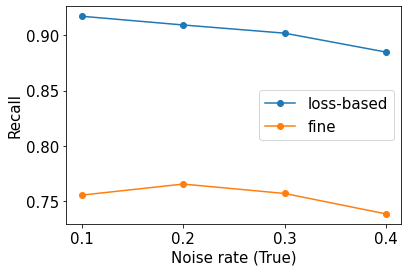

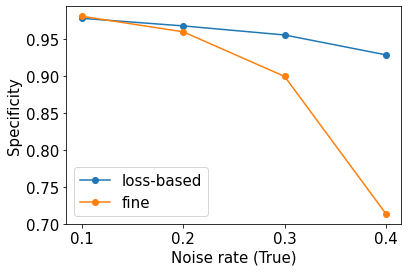

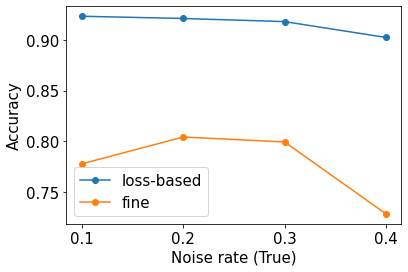

In [93]:
lkeys = ['cce', 'sce', 'gce', 'elr']
dkeys = [False, True]
plotkeys = ['precision', 'selected', 'recall', 'specificity', 'accuracy']


for lkey in lkeys:
    for dkey in dkeys:
        for pkey in plotkeys:
            loss = c10_loss[(c10_loss['lossfunction']==lkey) & (c10_loss['noisetype']==dkey)].sort_values('noiserate')
            fine = c10_fine[(c10_fine['lossfunction']==lkey) & (c10_fine['noisetype']==dkey)].sort_values('noiserate')
            
            if dkey:
                xaxis = [0.1,0.2,0.3,0.4]
            else:
                xaxis = [0.2,0.4,0.6,0.8]
            draw(loss, fine, lkey, dkey, xaxis, pkey)
            